In [15]:
 # IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib as mpl

In [16]:
#LOAD THE CSV FILE & USE THE COLOUMN'S 0, 7 and 11 
df = pd.read_csv('../data/dftRoadSafetyData_Accidents_2018.csv',usecols=[0,7,9,11],index_col=0,low_memory=False)
df

,Number_of_Vehicles,Date,Time
Accident_Index,,,
2018010080971,2,01/01/2018,01:30
2018010080973,1,01/01/2018,00:50
2018010080974,2,01/01/2018,00:45
2018010080981,2,01/01/2018,03:00
2018010080982,2,01/01/2018,02:20
...,...,...,...
2018984115718,2,23/12/2018,13:45
2018984115918,2,24/12/2018,10:45
2018984116018,3,20/12/2018,18:00


In [17]:
#Reassign Time to store date and time together
df['Time']= df['Date'] + ' ' + df['Time']
#Set the type of 'Time' to datetime
df['Time'] = pd.to_datetime(df.Time)
df

,Number_of_Vehicles,Date,Time
Accident_Index,,,
2018010080971,2,01/01/2018,2018-01-01 01:30:00
2018010080973,1,01/01/2018,2018-01-01 00:50:00
2018010080974,2,01/01/2018,2018-01-01 00:45:00
2018010080981,2,01/01/2018,2018-01-01 03:00:00
2018010080982,2,01/01/2018,2018-01-01 02:20:00
...,...,...,...
2018984115718,2,23/12/2018,2018-12-23 13:45:00
2018984115918,2,24/12/2018,2018-12-24 10:45:00
2018984116018,3,20/12/2018,2018-12-20 18:00:00


In [19]:
#Count the total number of hours
counts = df['Time'].dt.hour.value_counts().sort_index()
counts

0.0      1837
1.0      1267
2.0      1053
3.0       835
4.0       798
5.0      1198
6.0      2481
7.0      5638
8.0      8538
9.0      5875
10.0     5489
11.0     6110
12.0     7116
13.0     7138
14.0     7554
15.0     9500
16.0     9905
17.0    10615
18.0     8891
19.0     6479
20.0     4697
21.0     3676
22.0     3266
23.0     2666
Name: Time, dtype: int64

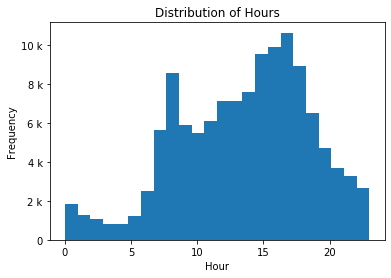

In [21]:
#plot a histogram of the hours
ax = df['Time'].dt.hour.plot.hist(bins=24)
ax.set_title("Distribution of Hours")
ax.set_xlabel('Hour')
ax.yaxis.set_major_formatter(
mpl.ticker.EngFormatter(places=0))
plt.savefig("Hours-Histogram.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
#get the describe of the Time column
df['Time'].describe()

count                  122622
unique                  86932
top       2018-09-11 18:00:00
freq                       12
first     2018-01-01 00:10:00
last      2018-12-31 23:59:00
Name: Time, dtype: object

In [25]:
#Reassign time to be just the hours in order to do a scatter plot
df['Time']= df['Time'].dt.hour

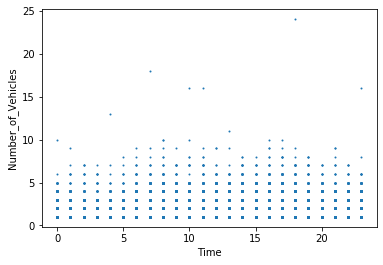

In [27]:
#plot a scatter plot of the Hour and Number of vehicles to see a correlation. 
ax1 = df.plot.scatter(x='Time',y='Number_of_Vehicles', s=1)
plt.show()